In [1]:
import torch
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation_easy import *
from data_preparation_hard import *

/home/bluefog/miniconda3/envs/bf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<font color=blue>数据分布：均匀分布&大异质性</font>

<font color=blue>矩阵性质：完全联通&稀疏矩阵</font>

<font color=red>四个组合，分别看Pull Sum和Pull Diag在最优学习率下的表现</font>

### 均匀分布的数据&稀疏矩阵

<font color=red>两层神经网络</font> 

<font color=blue>Pull Diag 最优参数：4.5e-2 / 5 到 5e-2 / 5  </font>

<font color=blue>Pull Sum 最优参数：0.2 到 0.4 </font>

此时，收敛速度的差异并不大，正确率上界Sum要高一点

In [10]:
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=85395).T
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard_shuffled()

A的第二大特征值: 0.5886189049139585
A的beta: 0.9210395218629739
A的spectral gap: 0.07896047813702611
A的kappa: 1.8348604358048797
S_A是: 91.01491565631535 

1.7891e+00, 1.9068e+06


Training Progress:   0%|          | 8/2000 [00:00<00:52, 38.23it/s, accuracy=11.8300000000%, epoch=10, loss=2474999516.8000001907]

Training Progress: 100%|██████████| 2000/2000 [00:50<00:00, 39.70it/s, accuracy=88.0800000000%, epoch=2000, loss=745331.7656250000] 


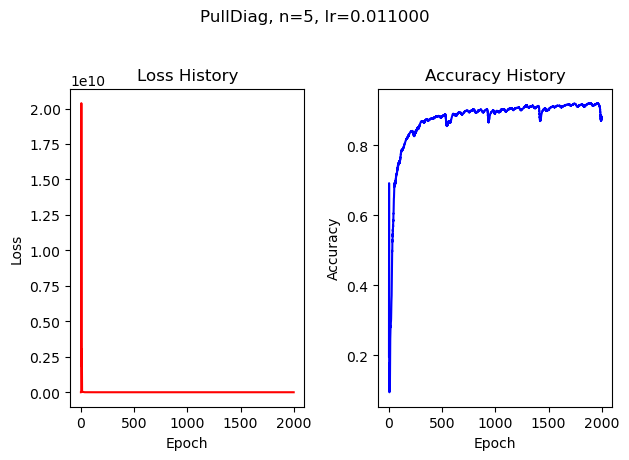

In [11]:
L1,A1=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(5.5e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   3%|▎         | 64/2000 [00:01<00:46, 41.93it/s, accuracy=85.5500000000%, epoch=64, loss=0.9321027756]

Training Progress: 100%|██████████| 2000/2000 [00:49<00:00, 40.38it/s, accuracy=96.7700000000%, epoch=2000, loss=0.1489798546]


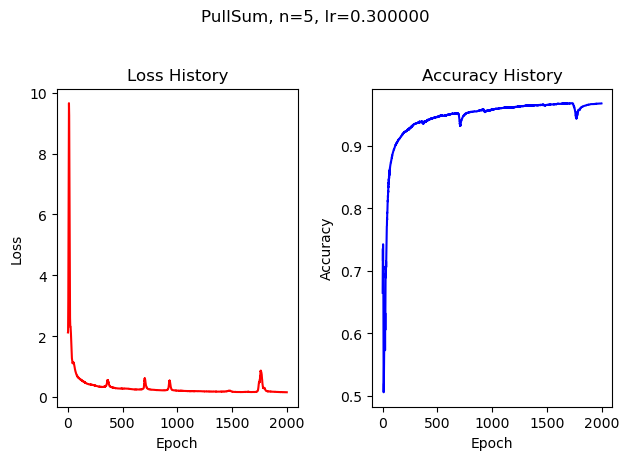

In [12]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(0.3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

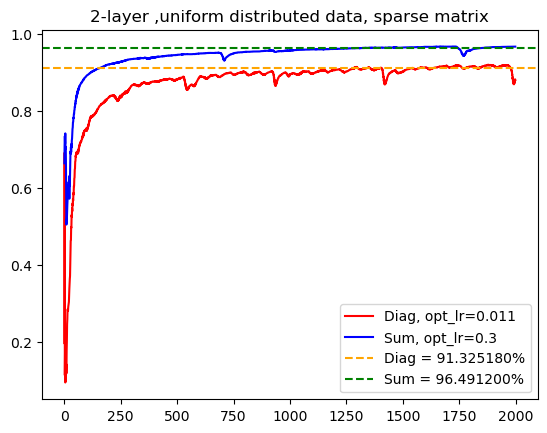

In [13]:
plt.plot(A1,color='r',label='Diag, opt_lr=0.011')
plt.plot(a1,color='b',label='Sum, opt_lr=0.3')
plt.title("2-layer ,uniform distributed data, sparse matrix")
number=np.mean(A1[1500:])
plt.axhline(y=number, color='orange', linestyle='--', label=f'Diag = {100*number:4f}%')
number=np.mean(a1[1500:])
plt.axhline(y=number, color='green', linestyle='--', label=f'Sum = {100*number:4f}%')
plt.legend()
plt.show()

### 均匀分布的数据&稀疏矩阵

<font color=red>四层神经网络</font> 

<font color=blue>Pull Diag 最优参数：1e-2/5 </font>

<font color=blue>Pull Sum 最优参数：0.1 到 0.2 </font>

此时，收敛速度的差异变大了一些（没快多少），正确率上界Sum要高一点

In [2]:
n=5
a=0.97
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=85395).T
A=a*A+(1-a)*I
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard_shuffled()

A的第二大特征值: 0.579810336653947
A的beta: 0.9086060481673253
A的spectral gap: 0.09139395183267474
A的kappa: 1.8348604358048801
S_A是: 78.63300703947077 

1.7815e+00, 1.8482e+04


Training Progress:   2%|▏         | 48/2000 [00:02<01:45, 18.54it/s, accuracy=46.2600000000%, epoch=49, loss=1.8302055359]

Training Progress: 100%|██████████| 2000/2000 [01:46<00:00, 18.80it/s, accuracy=94.7800000000%, epoch=2000, loss=0.4055657148]


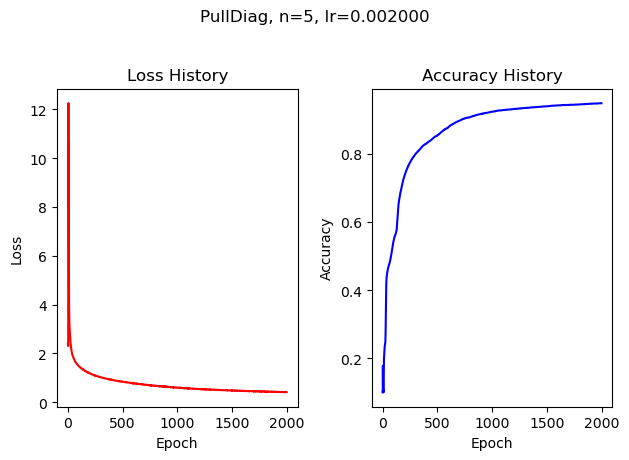

In [3]:
L2,A2=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_4layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(1e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   1%|          | 12/2000 [00:00<01:44, 18.98it/s, accuracy=69.8400000000%, epoch=12, loss=2.1801081657]

Training Progress: 100%|██████████| 2000/2000 [01:44<00:00, 19.06it/s, accuracy=97.5000000000%, epoch=2000, loss=0.1679232687]


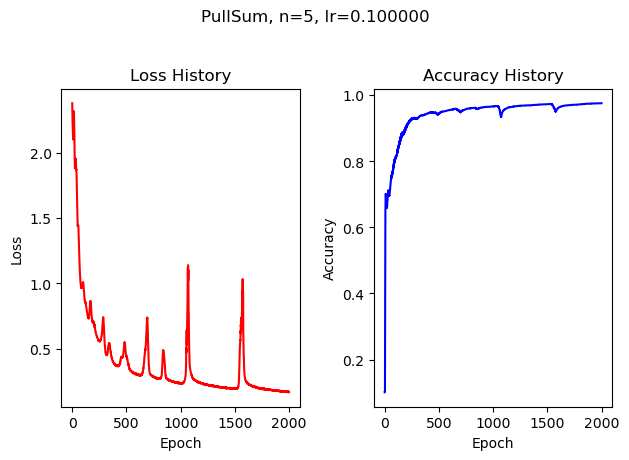

In [8]:
l2,a2=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_4layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(0.1/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

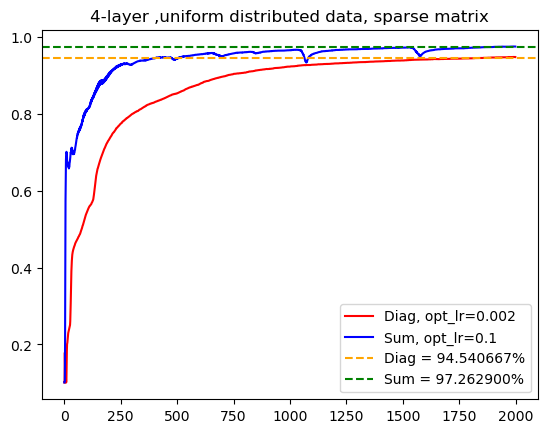

In [14]:
plt.plot(A2,color='r',label='Diag, opt_lr=0.002')
plt.plot(a2,color='b',label='Sum, opt_lr=0.1')
plt.title("4-layer ,uniform distributed data, sparse matrix")
number=np.mean(A2[1700:])
plt.axhline(y=number, color='orange', linestyle='--', label=f'Diag = {100*number:4f}%')
number=np.mean(a2[1700:])
plt.axhline(y=number, color='green', linestyle='--', label=f'Sum = {100*number:4f}%')
plt.legend()
plt.show()

### 大异质性的数据&完全互联矩阵

<font color=red>两层神经网络</font> 

<font color=blue>Pull Diag 最优参数：0.2/5到0.4/5 </font>

<font color=blue>Pull Sum 最优参数：0.7 </font>

此时，收敛速度和正确率上界都差别不大

<font color=red>不过可以看出的是，数据异质性增大后，算法能达到的正确率上界被压低了</font>

In [16]:
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=R#get_xinmeng_like_matrix(n,seed=85395).T
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard()

A的第二大特征值: 4.965068306494546e-17
A的beta: 2.0584085788909642e-16
A的spectral gap: 0.9999999999999998
A的kappa: 1.0000000000000007
S_A是: 4.472135954999583 

1.0000e+00, 5.0000e+00


Training Progress:   8%|▊         | 75/1000 [00:01<00:23, 39.82it/s, accuracy=77.6500000000%, epoch=79, loss=2.5242390633]

Training Progress: 100%|██████████| 1000/1000 [00:25<00:00, 39.17it/s, accuracy=87.3300000000%, epoch=1000, loss=0.1646226346]


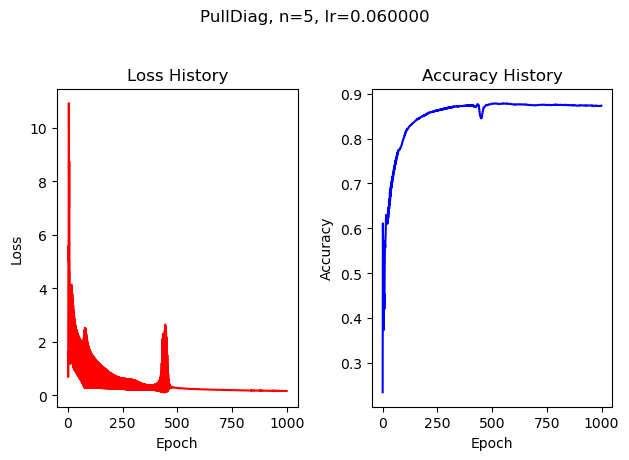

In [29]:
L1,A1=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1000,lr=(0.3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   1%|          | 10/1000 [00:00<00:24, 40.83it/s, accuracy=51.6600000000%, epoch=11, loss=1.7904799461]

Training Progress: 100%|██████████| 1000/1000 [00:24<00:00, 40.84it/s, accuracy=87.1600000000%, epoch=1000, loss=0.1388569236]


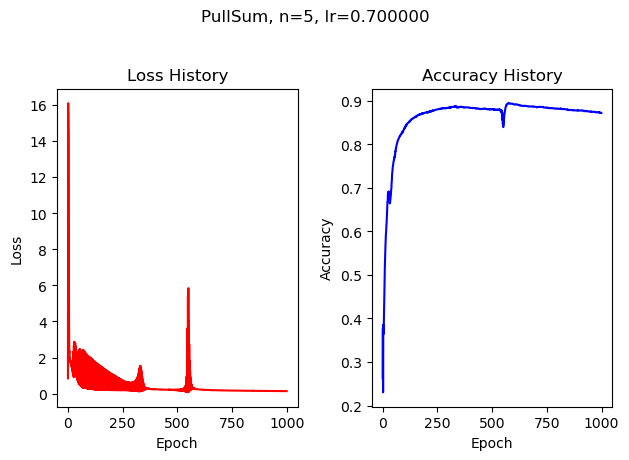

In [41]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1000,lr=(0.7/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

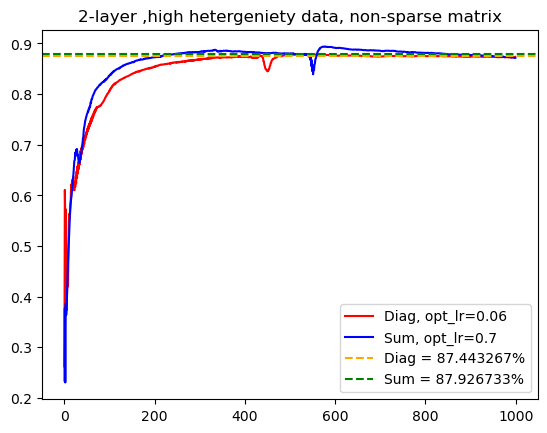

In [45]:
plt.plot(A1,color='r',label='Diag, opt_lr=0.06')
plt.plot(a1,color='b',label='Sum, opt_lr=0.7')
plt.title("2-layer ,high hetergeniety data, non-sparse matrix")
number=np.mean(A1[700:])
plt.axhline(y=number, color='orange', linestyle='--', label=f'Diag = {100*number:4f}%')
number=np.mean(a1[700:])
plt.axhline(y=number, color='green', linestyle='--', label=f'Sum = {100*number:4f}%')
plt.legend()
plt.show()

### 大异质性的数据&稀疏矩阵

<font color=red>两层神经网络</font> 

<font color=blue>Pull Diag 最优参数：1e-3 </font>

<font color=blue>Pull Sum 最优参数：0.09 到 0.11 </font>

收敛速度上，Sum远远快于Diag

正确率上界上，Sum也更好

In [2]:
n=5
a=0.996
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=85395).T
A=a*A+(1-a)*I
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard()

A的第二大特征值: 0.5873611081378232


A的beta: 0.9192604747002416
A的spectral gap: 0.08073952529975836
A的kappa: 1.8348604358048821
S_A是: 89.00945641112506 

1.7882e+00, 5.7410e+05


Training Progress: 100%|██████████| 20000/20000 [08:14<00:00, 40.44it/s, accuracy=82.3200000000%, epoch=2e+4, loss=0.4717333376] 


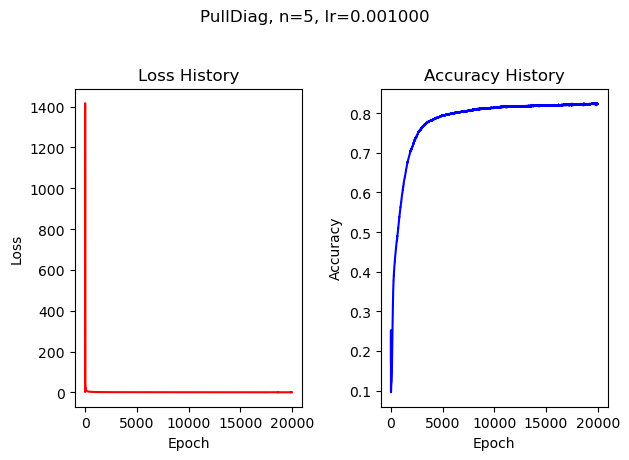

In [3]:
L1,A1=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=20000,lr=(5e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress: 100%|██████████| 1500/1500 [00:35<00:00, 42.26it/s, accuracy=87.5400000000%, epoch=1500, loss=0.2007020488]


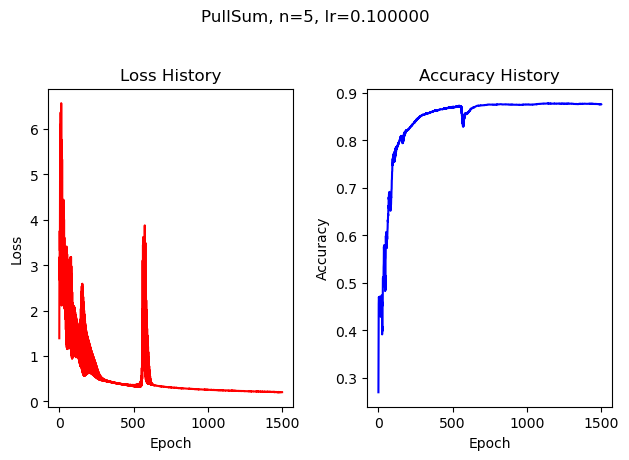

In [5]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(0.1/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

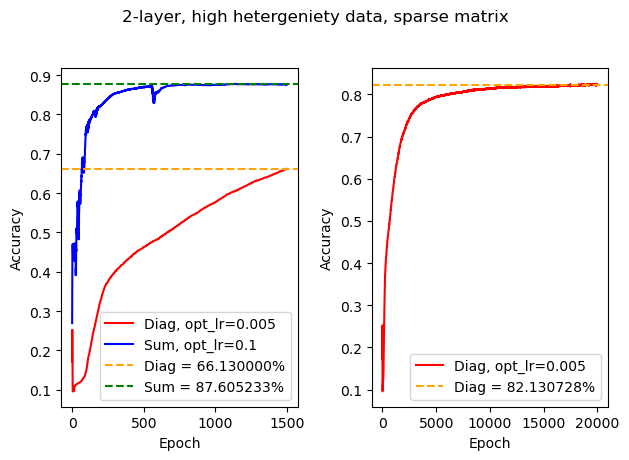

In [6]:
plt.subplot(1, 2, 1)
plt.plot(A1[:1500],color='r',label='Diag, opt_lr=0.005')
plt.plot(a1,color='b',label='Sum, opt_lr=0.1')
number=A1[1500]
plt.axhline(y=number, color='orange', linestyle='--', label=f'Diag = {100*number:4f}%')
number=np.mean(a1[900:])
plt.axhline(y=number, color='green', linestyle='--', label=f'Sum = {100*number:4f}%')    
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(A1,color='r',label='Diag, opt_lr=0.005')
number=np.mean(A1[15000:])
plt.axhline(y=number, color='orange', linestyle='--', label=f'Diag = {100*number:4f}%')   
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.suptitle("2-layer, high hetergeniety data, sparse matrix")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

再看一看新的算法，用贝叶斯优化寻找最优参数

In [2]:
n=5
a=0.996
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=85395).T
A=a*A+(1-a)*I
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard()

A的第二大特征值: 0.5873611081378232
A的beta: 0.9192604747002416
A的spectral gap: 0.08073952529975836
A的kappa: 1.8348604358048821
S_A是: 89.00945641112506 

1.7882e+00, 5.7410e+05


In [ ]:
import optuna

def objective(trial):
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
    beta = trial.suggest_loguniform('beta', 1e-3, 1e3)

    FRSD_l1, FRSD_a1 = train_FRSD(
        n=n,
        A=A,
        model_class=MNISTClassifier_2layer_2,
        seed_for_model=49,
        criterion_class=nn.CrossEntropyLoss,
        epochs=200,
        lr=lr,
        beta=beta,
        d=784,
        X_train_data=h_data,
        y_train_data=y_data,
        X_test_data=X_test,
        y_test_data=y_test,
        compute_accuracy=compute_accuracy_with_average_model,
        show_graph=False
    )

    # 返回你想优化的指标（这里使用最终的准确率）
    return FRSD_a1[-1]

# 创建一个优化器
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=120)

print(f"Best parameters: {study.best_params}")
print(f"Best accuracy: {study.best_value}")


FRSD：最优参数是：{'lr': 0.02394112042448164, 'beta': 0.29717968929086847}

Training Progress: 100%|██████████| 2000/2000 [15:10<00:00,  2.20it/s, accuracy=73.2200000000%, epoch=2000, loss=339210.4250000000] 


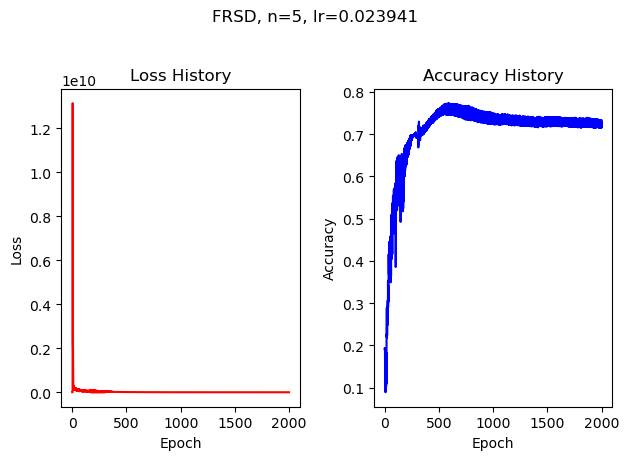

In [5]:
FRSD_l1, FRSD_a1 = train_FRSD(
        n=n,
        A=A,
        model_class=MNISTClassifier_2layer_2,
        seed_for_model=49,
        criterion_class=nn.CrossEntropyLoss,
        epochs=2000,
        lr=0.02394112042448164,
        beta=0.29717968929086847,
        d=784,
        X_train_data=h_data,
        y_train_data=y_data,
        X_test_data=X_test,
        y_test_data=y_test,
        compute_accuracy=compute_accuracy_with_average_model,
        show_graph=True
    )

Training Progress: 100%|██████████| 200/200 [01:30<00:00,  2.20it/s, accuracy=13.9100000000%, epoch=200, loss=367.4123315811]


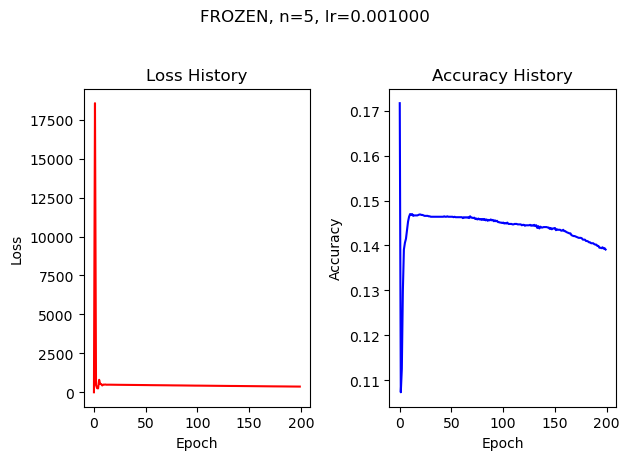

In [10]:
FROZEN_l1, FROZEN_a1 = train_FROZEN(
        n=n,
        A=A,
        model_class=MNISTClassifier_2layer_2,
        seed_for_model=49,
        criterion_class=nn.CrossEntropyLoss,
        epochs=200,
        lr=1e-3,
        beta=1e-3,
        d=784,
        X_train_data=h_data,
        y_train_data=y_data,
        X_test_data=X_test,
        y_test_data=y_test,
        compute_accuracy=compute_accuracy_with_average_model,
        show_graph=True
    )

In [3]:
import optuna
import numpy as np

def objective(trial):
    lr = trial.suggest_loguniform('lr', 1e-3, 5e-1)
    beta = trial.suggest_loguniform('beta', 1e-2, 1e2)

    try:
        FROZEN_l1, FROZEN_a1 = train_FROZEN(
            n=n,
            A=A,
            model_class=MNISTClassifier_2layer_2,
            seed_for_model=49,
            criterion_class=nn.CrossEntropyLoss,
            epochs=100,
            lr=lr,
            beta=beta,
            d=784,
            X_train_data=h_data,
            y_train_data=y_data,
            X_test_data=X_test,
            y_test_data=y_test,
            compute_accuracy=compute_accuracy_with_average_model,
            show_graph=False
        )

        # 检查 FROZEN_l1 是否包含 inf 或 nan
        if np.isnan(FROZEN_l1).any() or np.isinf(FROZEN_l1).any():
            print(f"Trial failed due to inf/nan in loss. lr: {lr}, beta: {beta}")
            return -np.inf  # 返回一个非常低的值

        # 返回最终的准确率
        return FROZEN_a1[-1]

    except Exception as e:
        print(f"Trial failed with exception: {e}")
        return -np.inf  # 若发生异常，返回一个非常低的值

# 创建一个优化器
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print(f"Best parameters: {study.best_params}")
print(f"Best accuracy: {study.best_value}")


[I 2024-09-08 01:05:21,683] A new study created in memory with name: no-name-5c500ef8-430c-490d-94e7-528a8cfd7a69
/tmp/ipykernel_813439/19595931.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-3, 5e-1)
/tmp/ipykernel_813439/19595931.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  beta = trial.suggest_loguniform('beta', 1e-2, 1e2)
Training Progress:   8%|▊         | 8/100 [00:04<00:47,  1.95it/s, accuracy=15.7400000000%, epoch=8, loss=16920615270437740191498108928.0000000000]
[I 2024-09-08 01:05:28,136] Trial 0 finished with value: -inf and parameters: {'lr': 0.001514188765294669, 'beta': 51.72552275225794}. Best is trial 0 

Stopping early due to inf/nan in loss at epoch 9
Trial failed due to inf/nan in loss. lr: 0.001514188765294669, beta: 51.72552275225794


Training Progress:  70%|███████   | 70/100 [00:32<00:14,  2.14it/s, accuracy=9.8000000000%, epoch=70, loss=20802771291828921274448536928256.0000000000]
[I 2024-09-08 01:06:01,488] Trial 1 finished with value: -inf and parameters: {'lr': 0.09011424577927186, 'beta': 0.1401217173771651}. Best is trial 0 with value: -inf.


Stopping early due to inf/nan in loss at epoch 71
Trial failed due to inf/nan in loss. lr: 0.09011424577927186, beta: 0.1401217173771651


Training Progress:   7%|▋         | 7/100 [00:03<00:47,  1.97it/s, accuracy=14.2800000000%, epoch=7, loss=3894522437010199947543314432.0000000000]
[I 2024-09-08 01:06:05,691] Trial 2 finished with value: -inf and parameters: {'lr': 0.002487866766356721, 'beta': 80.84783562261956}. Best is trial 0 with value: -inf.


Stopping early due to inf/nan in loss at epoch 8
Trial failed due to inf/nan in loss. lr: 0.002487866766356721, beta: 80.84783562261956


Training Progress:   7%|▋         | 7/100 [00:03<00:47,  1.96it/s, accuracy=6.6800000000%, epoch=7, loss=1648655464231601264824156160.0000000000]
[I 2024-09-08 01:06:09,912] Trial 3 finished with value: -inf and parameters: {'lr': 0.02163115415552615, 'beta': 81.05568497095689}. Best is trial 0 with value: -inf.


Stopping early due to inf/nan in loss at epoch 8
Trial failed due to inf/nan in loss. lr: 0.02163115415552615, beta: 81.05568497095689


Training Progress:  30%|███       | 30/100 [00:14<00:33,  2.11it/s, accuracy=12.6200000000%, epoch=30, loss=209877778534181742813751803904.0000000000]
[I 2024-09-08 01:06:24,737] Trial 4 finished with value: -inf and parameters: {'lr': 0.29192770703413984, 'beta': 0.019229176311049}. Best is trial 0 with value: -inf.


Stopping early due to inf/nan in loss at epoch 31
Trial failed due to inf/nan in loss. lr: 0.29192770703413984, beta: 0.019229176311049


Training Progress:  24%|██▍       | 24/100 [00:11<00:36,  2.10it/s, accuracy=11.3500000000%, epoch=24, loss=20490761603162448486360678400.0000000000]
[I 2024-09-08 01:06:36,836] Trial 5 finished with value: -inf and parameters: {'lr': 0.404233112679324, 'beta': 0.017091372581285225}. Best is trial 0 with value: -inf.


Stopping early due to inf/nan in loss at epoch 25
Trial failed due to inf/nan in loss. lr: 0.404233112679324, beta: 0.017091372581285225


Training Progress:   9%|▉         | 9/100 [00:04<00:45,  2.00it/s, accuracy=13.6900000000%, epoch=9, loss=191032243432226784022760521728.0000000000]
[I 2024-09-08 01:06:41,965] Trial 6 finished with value: -inf and parameters: {'lr': 0.0018809145251578443, 'beta': 37.894495609807855}. Best is trial 0 with value: -inf.


Stopping early due to inf/nan in loss at epoch 10
Trial failed due to inf/nan in loss. lr: 0.0018809145251578443, beta: 37.894495609807855


Training Progress:   8%|▊         | 8/100 [00:04<00:46,  1.97it/s, accuracy=15.6000000000%, epoch=8, loss=19630780317666776114805080064.0000000000]
[I 2024-09-08 01:06:46,654] Trial 7 finished with value: -inf and parameters: {'lr': 0.005073873631512517, 'beta': 49.28226915085497}. Best is trial 0 with value: -inf.


Stopping early due to inf/nan in loss at epoch 9
Trial failed due to inf/nan in loss. lr: 0.005073873631512517, beta: 49.28226915085497


Training Progress: 100%|██████████| 100/100 [00:45<00:00,  2.22it/s, accuracy=10.2800000000%, epoch=100, loss=19082878412390.3984375000]
[I 2024-09-08 01:07:32,304] Trial 8 finished with value: 0.1028 and parameters: {'lr': 0.0021827798994362825, 'beta': 0.6735243138461559}. Best is trial 8 with value: 0.1028.
Training Progress: 100%|██████████| 100/100 [00:45<00:00,  2.19it/s, accuracy=13.8300000000%, epoch=100, loss=195832.7087097168]
[I 2024-09-08 01:08:18,509] Trial 9 finished with value: 0.1383 and parameters: {'lr': 0.01161966747542162, 'beta': 0.12439906135449073}. Best is trial 9 with value: 0.1383.
Training Progress:  18%|█▊        | 18/100 [00:08<00:39,  2.08it/s, accuracy=10.1400000000%, epoch=18, loss=1327167578627258216465039360.0000000000]
[I 2024-09-08 01:08:27,814] Trial 10 finished with value: -inf and parameters: {'lr': 0.013994512467478782, 'beta': 5.234752447625823}. Best is trial 9 with value: 0.1383.


Stopping early due to inf/nan in loss at epoch 19
Trial failed due to inf/nan in loss. lr: 0.013994512467478782, beta: 5.234752447625823


Training Progress: 100%|██████████| 100/100 [00:46<00:00,  2.17it/s, accuracy=9.6900000000%, epoch=100, loss=1506935.5960937501]
[I 2024-09-08 01:09:14,576] Trial 11 finished with value: 0.0969 and parameters: {'lr': 0.007223904513658117, 'beta': 0.4420039741397873}. Best is trial 9 with value: 0.1383.
Training Progress: 100%|██████████| 100/100 [00:45<00:00,  2.19it/s, accuracy=9.8000000000%, epoch=100, loss=17286735850809308825518080.0000000000]
[I 2024-09-08 01:10:00,975] Trial 12 finished with value: 0.098 and parameters: {'lr': 0.05770924623068141, 'beta': 0.14798233842093061}. Best is trial 9 with value: 0.1383.
Training Progress:  17%|█▋        | 17/100 [00:07<00:38,  2.13it/s, accuracy=5.3700000000%, epoch=17, loss=1518479449312460.7500000000]
[W 2024-09-08 01:10:09,582] Trial 13 failed with parameters: {'lr': 0.0051317166208770535, 'beta': 2.1667866698919154} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/bluefog/miniconda

KeyboardInterrupt: 

Training Progress: 100%|██████████| 1000/1000 [07:45<00:00,  2.15it/s, accuracy=55.2100000000%, epoch=1000, loss=2691974.7250000001]


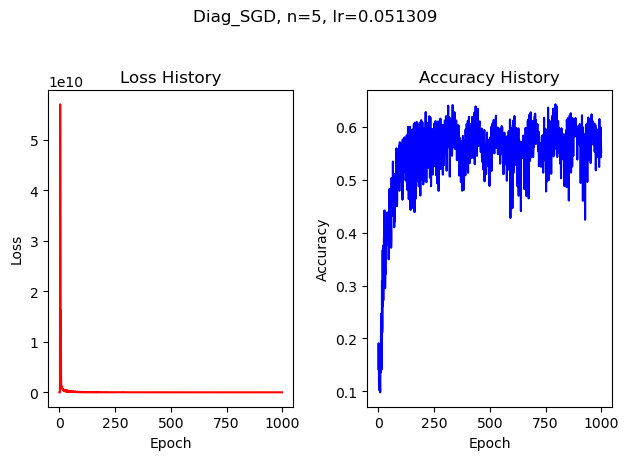

In [8]:
DiagSGD_l1, DiagSGD_a1 = train_Diag_SDG(
        n=n,
        A=A,
        model_class=MNISTClassifier_2layer_2,
        seed_for_model=49,
        criterion_class=nn.CrossEntropyLoss,
        epochs=1000,
        lr=0.05130908945233729,
        X_train_data=h_data,
        y_train_data=y_data,
        X_test_data=X_test,
        y_test_data=y_test,
        compute_accuracy=compute_accuracy_with_average_model,
        show_graph=True
    )

Training Progress: 100%|██████████| 1000/1000 [07:41<00:00,  2.17it/s, accuracy=68.3600000000%, epoch=1000, loss=539975.3875000000]


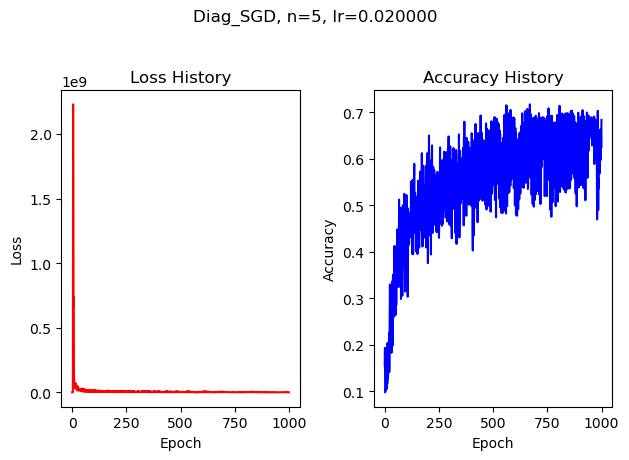

In [9]:
DiagSGD_l1, DiagSGD_a1 = train_Diag_SDG(
        n=n,
        A=A,
        model_class=MNISTClassifier_2layer_2,
        seed_for_model=49,
        criterion_class=nn.CrossEntropyLoss,
        epochs=1000,
        lr=0.02,
        X_train_data=h_data,
        y_train_data=y_data,
        X_test_data=X_test,
        y_test_data=y_test,
        compute_accuracy=compute_accuracy_with_average_model,
        show_graph=True
    )

In [5]:
import optuna
import numpy as np

def objective(trial):
    lr = trial.suggest_loguniform('lr', 1e-4, 1e-1)

    try:
        DiagSGD_l1, DiagSGD_a1 = train_Diag_SDG(
            n=n,
            A=A,
            model_class=MNISTClassifier_2layer_2,
            seed_for_model=49,
            criterion_class=nn.CrossEntropyLoss,
            epochs=100,
            lr=lr,
            X_train_data=h_data,
            y_train_data=y_data,
            X_test_data=X_test,
            y_test_data=y_test,
            compute_accuracy=compute_accuracy_with_average_model,
            show_graph=False
        )

        # 检查 FROZEN_l1 是否包含 inf 或 nan
        if np.isnan(DiagSGD_l1).any() or np.isinf(DiagSGD_l1).any():
            print(f"Trial failed due to inf/nan in loss. lr: {lr}")
            return -np.inf  # 返回一个非常低的值

        # 返回最终的准确率
        return DiagSGD_a1[-1]

    except Exception as e:
        print(f"Trial failed with exception: {e}")
        return -np.inf  # 若发生异常，返回一个非常低的值

# 创建一个优化器
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print(f"Best parameters: {study.best_params}")
print(f"Best accuracy: {study.best_value}")


[I 2024-09-08 01:21:26,360] A new study created in memory with name: no-name-5b89ae91-a15a-4dbe-b14d-a47f8da1e7e4
/tmp/ipykernel_820520/2593462468.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-4, 1e-1)
Training Progress: 100%|██████████| 100/100 [00:46<00:00,  2.16it/s, accuracy=53.1300000000%, epoch=100, loss=24284252.0000000000]
[I 2024-09-08 01:22:13,410] Trial 0 finished with value: 0.5313 and parameters: {'lr': 0.0531884496304346}. Best is trial 0 with value: 0.5313.
Training Progress: 100%|██████████| 100/100 [00:45<00:00,  2.18it/s, accuracy=17.6200000000%, epoch=100, loss=3.2810359240]
[I 2024-09-08 01:23:00,042] Trial 1 finished with value: 0.1762 and parameters: {'lr': 0.0007822524517419699}. Best is trial 0 with value: 0.5313.
Training Progress: 100%|██████████| 100/100 [0

Best parameters: {'lr': 0.04863469887123948}
Best accuracy: 0.5517


In [7]:
import optuna
import numpy as np

def objective(trial):
    # 缩小 lr 的搜索范围，在已找到的最佳值附近搜索
    lr = trial.suggest_loguniform('lr', 0.9 * 0.04863469887123948, 1.1 * 0.04863469887123948)

    try:
        DiagSGD_l1, DiagSGD_a1 = train_Diag_SDG(
            n=n,
            A=A,
            model_class=MNISTClassifier_2layer_2,
            seed_for_model=49,
            criterion_class=nn.CrossEntropyLoss,
            epochs=100,
            lr=lr,
            X_train_data=h_data,
            y_train_data=y_data,
            X_test_data=X_test,
            y_test_data=y_test,
            compute_accuracy=compute_accuracy_with_average_model,
            show_graph=False
        )

        # 检查 FROZEN_l1 是否包含 inf 或 nan
        if np.isnan(DiagSGD_l1).any() or np.isinf(DiagSGD_l1).any():
            print(f"Trial failed due to inf/nan in loss. lr: {lr}")
            return -np.inf  # 返回一个非常低的值

        # 返回最终的准确率
        return DiagSGD_a1[-1]

    except Exception as e:
        print(f"Trial failed with exception: {e}")
        return -np.inf  # 若发生异常，返回一个非常低的值

# 创建一个优化器并使用缩小后的搜索空间进行优化
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

print(f"Best parameters: {study.best_params}")
print(f"Best accuracy: {study.best_value}")

[I 2024-09-08 01:44:26,546] A new study created in memory with name: no-name-6757b54f-0a9e-4d73-890e-d91a5da9b571
/tmp/ipykernel_820520/3704520231.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 0.9 * 0.04863469887123948, 1.1 * 0.04863469887123948)
Training Progress: 100%|██████████| 100/100 [00:46<00:00,  2.14it/s, accuracy=56.8500000000%, epoch=100, loss=24685984.6000000015]
[I 2024-09-08 01:45:13,867] Trial 0 finished with value: 0.5685 and parameters: {'lr': 0.05130908945233729}. Best is trial 0 with value: 0.5685.
Training Progress: 100%|██████████| 100/100 [00:46<00:00,  2.14it/s, accuracy=51.4700000000%, epoch=100, loss=72024346.7999999970]
[I 2024-09-08 01:46:01,224] Trial 1 finished with value: 0.5147 and parameters: {'lr': 0.044492925902224985}. Best is trial 0 with value: 0.568

Best parameters: {'lr': 0.05130908945233729}
Best accuracy: 0.5685
